In [ ]:
# Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
import keras

In [ ]:
#Mount Google drive to save model
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading the dataset
Load the training and testing MNIST images into the variables X_train and X_test, with y_train and y_test used to hold the matching digits. Keep in mind that the shape of every image in the MNIST dataset is 28 x 28 pixels.

In [ ]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


Reshape the inputs (X_train and X_test) to a shape that can be an input for the ANN model. The Keras reshape function takes as arguments the number of images (60,000 for X_train and 10,000 for X_test), the shape of each image (28×28), and the number of color channels – 1 in this case because images are greyscale.

Then, one-hot-encode the target variable, mapping a variable to each target label – in our case, ‘0’, ‘1’, ‘2’, etc. because we are recognizing digits.

In [ ]:
#from keras import utils as np_utils
from keras.utils import np_utils
batch_size = 128
num_classes = 10
epochs = 25
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize to 0 to 1 range
X_train /= 255
X_test /= 255

print('Number of images in training Set: ', X_train.shape[0], )
print('Number of images in training Set: ', X_test.shape[0], )
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)


print('Training set size:', X_train.shape)
print('Testing set size:', X_test.shape)
print('Training label size;',y_train.shape)
print('testing  label size;',y_test.shape)


Number of images in training Set:  60000
Number of images in training Set:  10000
Training set size: (60000, 784)
Testing set size: (10000, 784)
Training label size; (60000, 10)
testing  label size; (10000, 10)


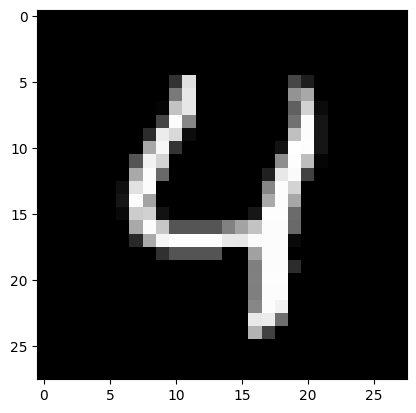

In [ ]:

plt.imshow(X_test[4:5].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
print("Label:",y_test[4:5])

Label: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


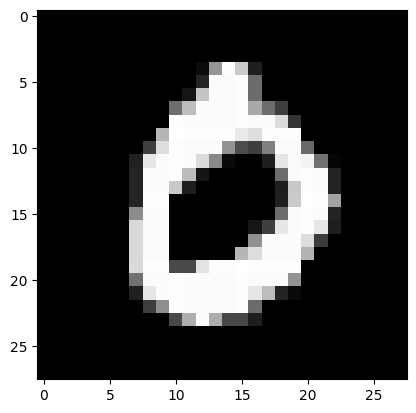

In [ ]:
plt.imshow(X_test[3:4].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
print("Label:",y_test[3:4])

Label: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
# NN Model structure
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


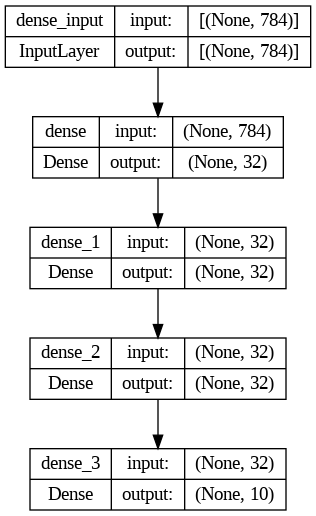

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_CNN.png', show_shapes=True, show_layer_names=True)

Shape of First Layer (784, 32)
Visualization of First Layer


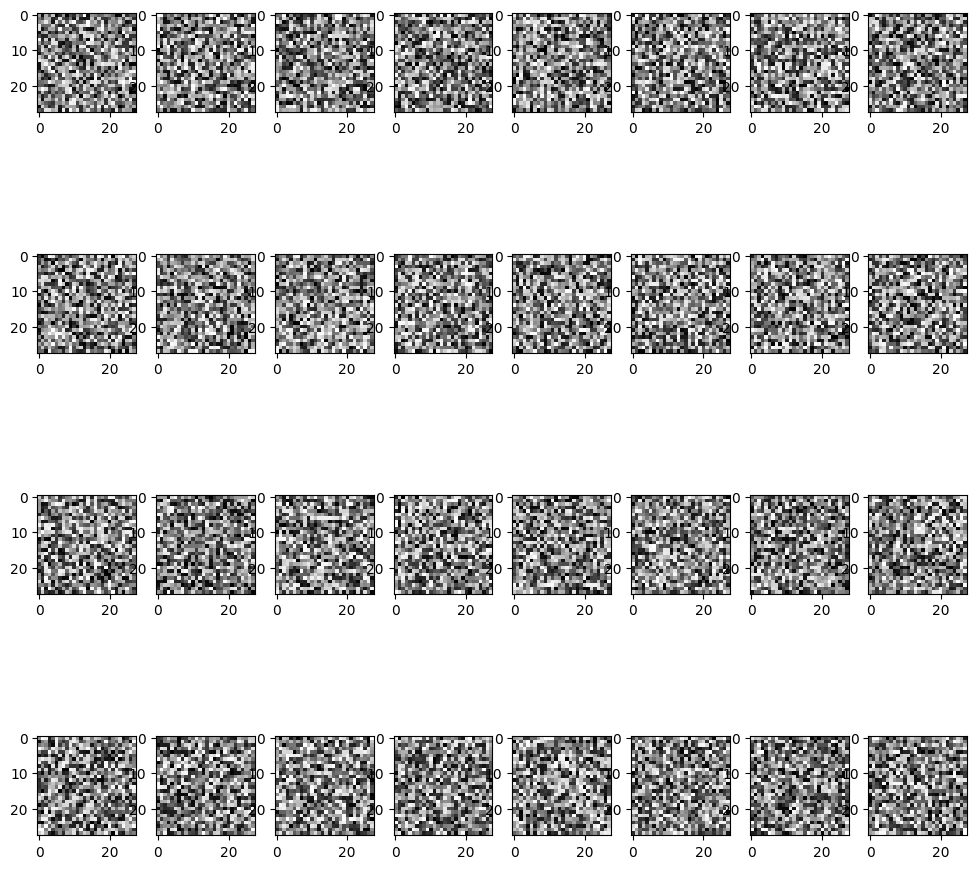

In [ ]:
#Weights before training
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
#Model compilation
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=["accuracy"])

In [ ]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(X_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2)

In [ ]:
# save model and architecture to single file
model.save('/content/MNISTANN.h5')
model.summary()

print("Saved model to disk")

In [ ]:
# Loading saved model from Drive.
from keras.models import load_model
model = load_model('/content/MNISTANN.h5')
print("Model is Loaded")
model.summary()

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
313/313 [==============================] - 1s 2ms/step - loss: 0.1315 - accuracy: 0.9622
Test Accuracy: 96.21999859809875


In [ ]:
#Trainig accuracy
y_pred=model.predict(X_train)

y_pred=np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred.shape)

[5 0 4 ... 5 6 8]
(60000,)


In [ ]:
# Original Training  label
y_train_original=np.argmax(y_train,axis=1)
print(y_train_original)

[5 0 4 ... 5 6 8]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_train_original, y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_train_original, y_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5923
           1       0.99      0.99      0.99      6742
           2       0.98      0.99      0.98      5958
           3       0.98      0.97      0.98      6131
           4       0.98      0.98      0.98      5842
           5       0.98      0.97      0.97      5421
           6       0.98      0.99      0.99      5918
           7       0.97      0.99      0.98      6265
           8       0.97      0.98      0.98      5851
           9       0.98      0.96      0.97      5949

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000

Confusion matrix 
[[5868    0   18    2    5    4    6    6   14    0]
 [   0 6659   24    6    4    1    5    9   27    7]
 [  16    7 5872   10    7    0    5   28   12    1]
 [   3    9   28 5976    0   38    1   24

In [ ]:
# testing accuracy
y_pred=model.predict(X_test)

y_pred=np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred.shape)

[7 2 1 ... 4 5 6]
(10000,)


In [ ]:
# Original testing Label
y_test_original=np.argmax(y_test,axis=1)
y_test_original

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_test_original, y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_test_original, y_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.97      0.96      1032
           3       0.94      0.97      0.95      1010
           4       0.96      0.97      0.97       982
           5       0.96      0.93      0.95       892
           6       0.97      0.97      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.96      0.96      0.96       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Confusion matrix 
[[ 963    0    4    1    1    2    4    3    2    0]
 [   0 1112    5    4    0    1    4    1    8    0]
 [   7    2 1002    2    0    0    4   10    5    0]
 [   0    3    7  976    0   12    0    4

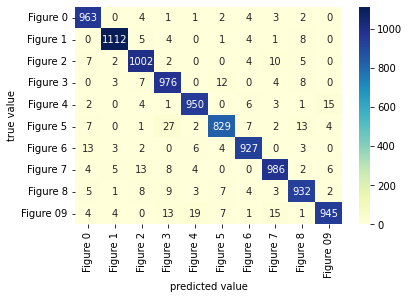

In [ ]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test_original,y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g', xticklabels=['Figure 0','Figure 1','Figure 2','Figure 3','Figure 4','Figure 5','Figure 6','Figure 7','Figure 8','Figure 09'], 
            yticklabels=['Figure 0','Figure 1','Figure 2','Figure 3','Figure 4','Figure 5','Figure 6','Figure 7','Figure 8','Figure 09']); 

plt.xlabel('predicted value')
plt.ylabel('true value');

Shape of First Layer (784, 32)
Visualization of First Layer


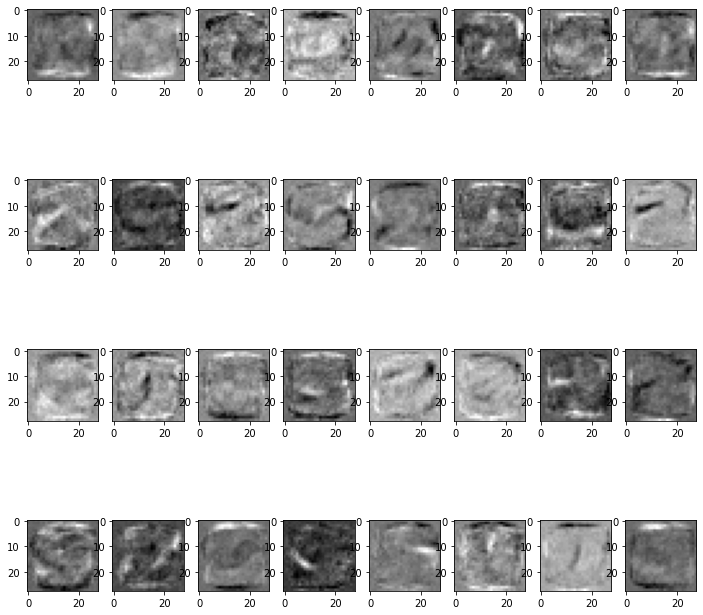

In [ ]:
# Weights after training of First layer
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

Shape of Third Layer (32, 10)
Visualization of Third Layer


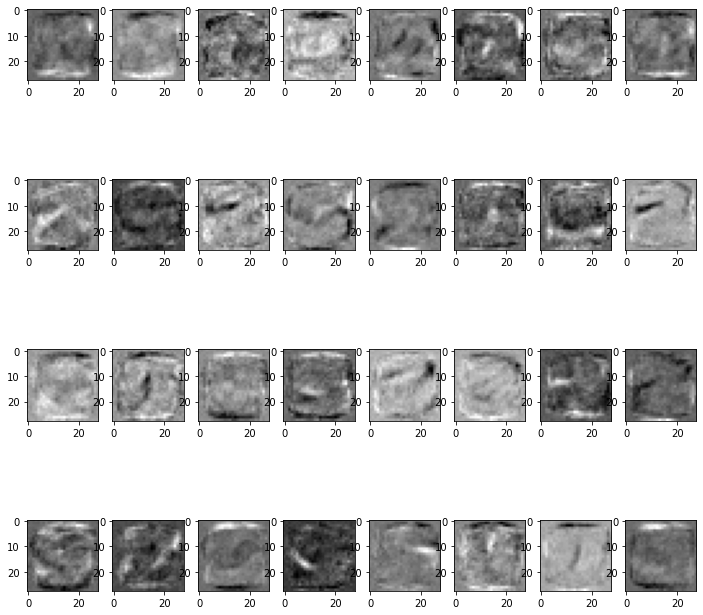

In [ ]:
# Weights after training of Third layer
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer3 = np.array(w[3][0])
print("Shape of Third Layer",layer3.shape)
print("Visualization of Third Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
# Write the testing input and output variables
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13150833547115326
Test accuracy: 0.9621999859809875


In [ ]:
print("Label:",y_test[15:16])
plt.imshow(X_test[15:16].reshape(28,28), cmap='gray')
plt.show()

Label: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [ ]:
# Write the index of the test sample to test
prediction = model.predict(X_test[15:16])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Prediction
 [5.5683199e-06 1.4964729e-03 2.0616730e-05 6.2652864e-02 8.8330649e-04
 8.3511549e-01 1.3970162e-03 5.5305611e-07 9.6097231e-02 2.3309318e-03]

Thresholded output
 [0 0 0 0 0 1 0 0 0 0]


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving img_1.jpg to img_1.jpg


In [ ]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread('img_1.jpg', cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

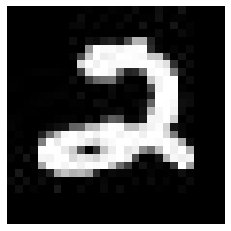

In [ ]:
# Load image as grayscale

# Write the path to the image

image = cv2.imread('img_1.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28)) 
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

In [ ]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:',np.where(thresholded == 1)[1][0])

Prediction Score:
 [2.37250752e-05 6.16954057e-05 9.99688387e-01 4.16253824e-05
 5.28136734e-09 4.57245530e-09 2.45460996e-07 1.04864994e-04
 7.94567313e-05 2.38358933e-08]

Thresholded Score:
 [0 0 1 0 0 0 0 0 0 0]

Predicted Digit: 2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install streamlit==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.3 MB 12.0 MB/s 
     |████████████████████████████████| 181 kB 71.1 MB/s 
     |████████████████████████████████| 4.3 MB 55.5 MB/s 
     |████████████████████████████████| 78 kB 8.3 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 132 kB 74.5 MB/s 
     |████████████████████████████████| 132 kB 73.4 MB/s 
     |████████████████████████████████| 793 kB 70.6 MB/s 
     |████████████████████████████████| 423 kB 76.0 MB/s 
     |████████████████████████████████| 381 kB 73.0 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=7ca13f97c0bed5f3a4312c2df70bf410ba34ec43d9f4f4c9488ea389a117ffa7
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators
  Attempting uninstall: torna

In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 9.2 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=14204c3200edad39b1435608372732dff00cc853b028e6fc1f9eda419f50ddfd
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [ ]:
!ngrok authtoken 1oEm0wopEJyjrT38ULluwUKK5fq_7ai4ZocZJ2YuFuoiJfoMh

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.preprocessing import image
import os
from werkzeug.utils import secure_filename
st.set_option('deprecation.showfileUploaderEncoding', False)
# Loading saved model from Drive.
from keras.models import load_model
model = load_model('/content/drive/My Drive/FDP/MNISTANN.h5')

html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">POORNIMA iNSTITUTE OF ENGINEERING & TECHNOLOGY</p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">SUMMER INTERNSHIP 2022</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)
  
st.title("""
        Digit Recognition
         """
         )
file= st.file_uploader("Please upload image", type=("jpg", "png"))

import cv2
from  PIL import Image, ImageOps
def import_and_predict(image_data):
  
  image_resized = cv2.resize(image_data, (28, 28))  
  prediction = model.predict(image_resized.reshape(1,784))
  print('Prediction Score:\n',prediction[0])
  thresholded = (prediction>0.5)*1
  print('\nThresholded Score:\n',thresholded[0])
  print('\nPredicted Digit:',np.where(thresholded == 1)[1][0])
  digit = np.where(thresholded == 1)[1][0]
  #st.image(image_data, use_column_width=True)
  return digit
if file is None:
  st.text("Please upload an Image file")
else:
  image=Image.open(file)
  image=np.array(image)
  #file_bytes = np.asarray(bytearray(file.read()), dtype=np.uint8)
  #image = cv2.imdecode(file_bytes, 1)
  st.image(image,caption='Uploaded Image.', use_column_width=True)
    
if st.button("Predict Digit"):
  result=import_and_predict(image)
  st.success('Model has predicted the image is of  {}'.format(result))
if st.button("About"):
  st.header(" Deepak Moud")
  st.subheader("Assistant Professor, Department of Computer Engineering")
  
html_temp = """
   <div class="" style="background-color:orange;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:20px;color:white;margin-top:10px;">Department of Computer Engineering</p></center> 
   <center><p style="font-size:20px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)

Overwriting app.py


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url

<NgrokTunnel: "http://9d0a-34-91-183-150.ngrok.io" -> "http://localhost:80">

In [ ]:
 !streamlit run --server.port 80 app.py

2022-08-09 05:33:47.340 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://34.91.183.150:80

2022-08-09 05:33:51.460346: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Prediction Score:
 [9.99613225e-01 1.21150465e-10 1.44677280e-04 5.84503539e-08
 2.00946779e-05 2.85652277e-05 1.04111805e-05 1.80836752e-04
 2.91843207e-07 1.84538021e-06]

Thresholded Score:
 [1 0 0 0 0 0 0 0 0 0]

Predicted Digit: 0
  Stopping...
  Stopping...


In [ ]:
ngrok.kill()